In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings('ignore')

In [10]:
df = pd.read_csv('gold_monthly_csv.csv')
df.head()

,Date,Price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [11]:
# cek rows and columns
df.shape

(847, 2)

In [12]:
print(f"Date range of gold prices available from {df.loc[:, 'Date'][0]} to {df.loc[:, 'Date'][len(df)-1]}")

Date range of gold prices available from 1950-01 to 2020-07


In [13]:
date = pd.date_range (start = '1/1/1950', end = '8/1/2020', freq = 'M')
date

DatetimeIndex(['1950-01-31', '1950-02-28', '1950-03-31', '1950-04-30',
               '1950-05-31', '1950-06-30', '1950-07-31', '1950-08-31',
               '1950-09-30', '1950-10-31',
               ...
               '2019-10-31', '2019-11-30', '2019-12-31', '2020-01-31',
               '2020-02-29', '2020-03-31', '2020-04-30', '2020-05-31',
               '2020-06-30', '2020-07-31'],
              dtype='datetime64[ns]', length=847, freq='M')

In [14]:
df['month'] = date
df.drop('Date', axis = 1, inplace = True)
df = df.set_index('month')
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


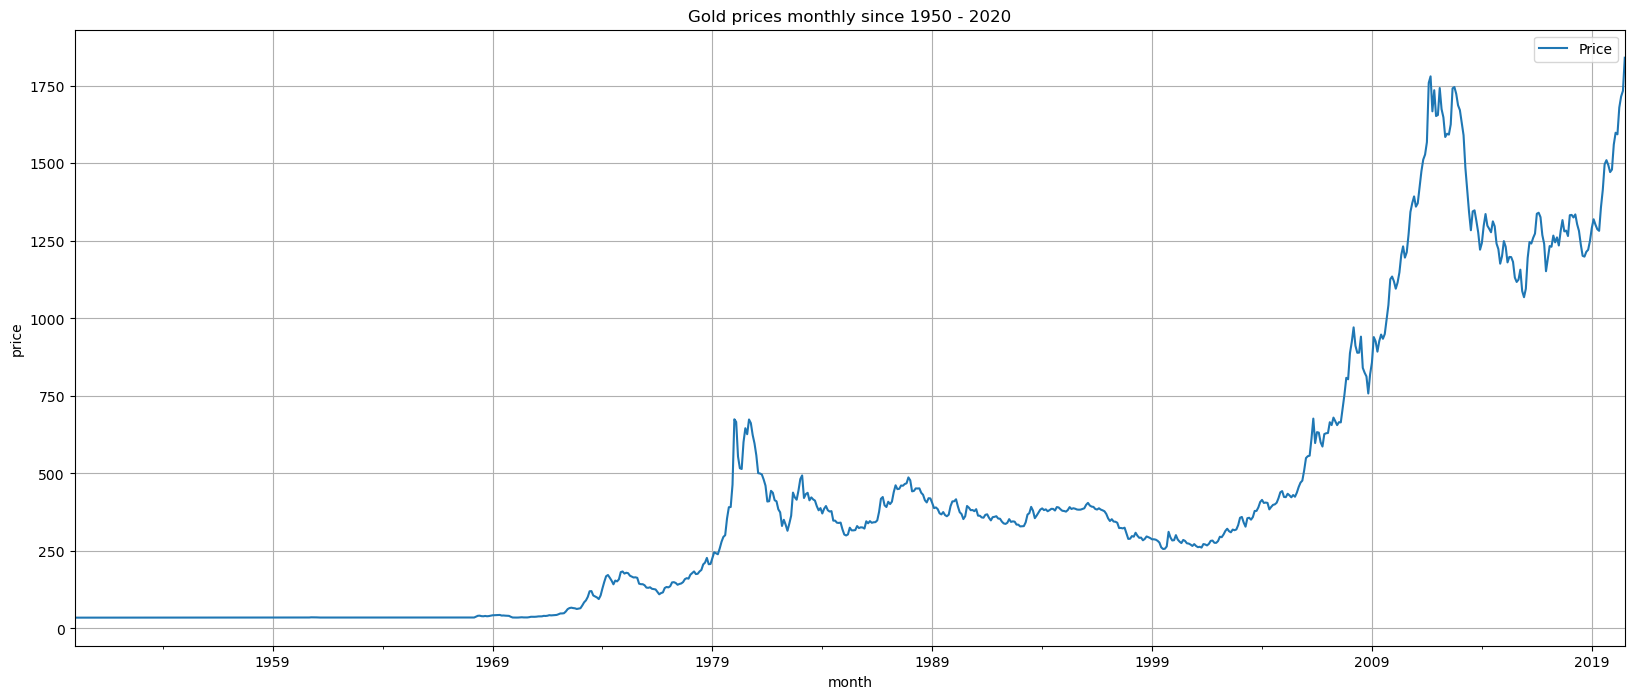

In [15]:
df.plot(figsize=(20,8))
plt.title("Gold prices monthly since 1950 - 2020")
plt.xlabel('month')
plt.ylabel('price')
plt.grid()

In [16]:
round(df.describe(),3)

,Price
count,847.000
mean,416.557
std,453.665
min,34.490
25%,35.190
50%,319.622
75%,447.029
max,1840.807


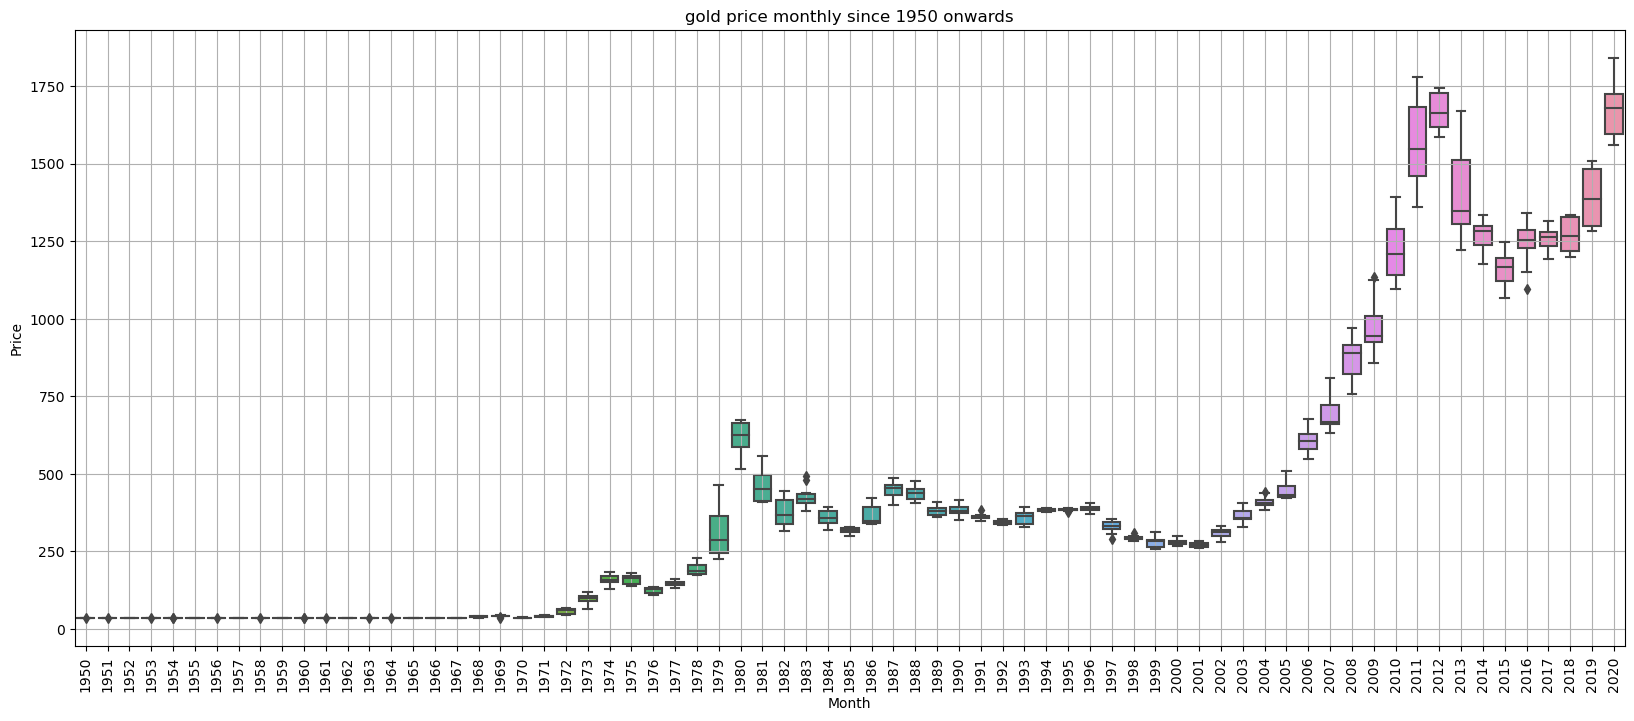

In [17]:
_, ax = plt.subplots(figsize=(20,8))
sns.boxplot(x = df.index.year, y = df.values[:,0], ax = ax)
plt.title("gold price monthly since 1950 onwards")
plt.xlabel("Month")
plt.ylabel("Price")
plt.xticks(rotation = 90)
plt.grid()

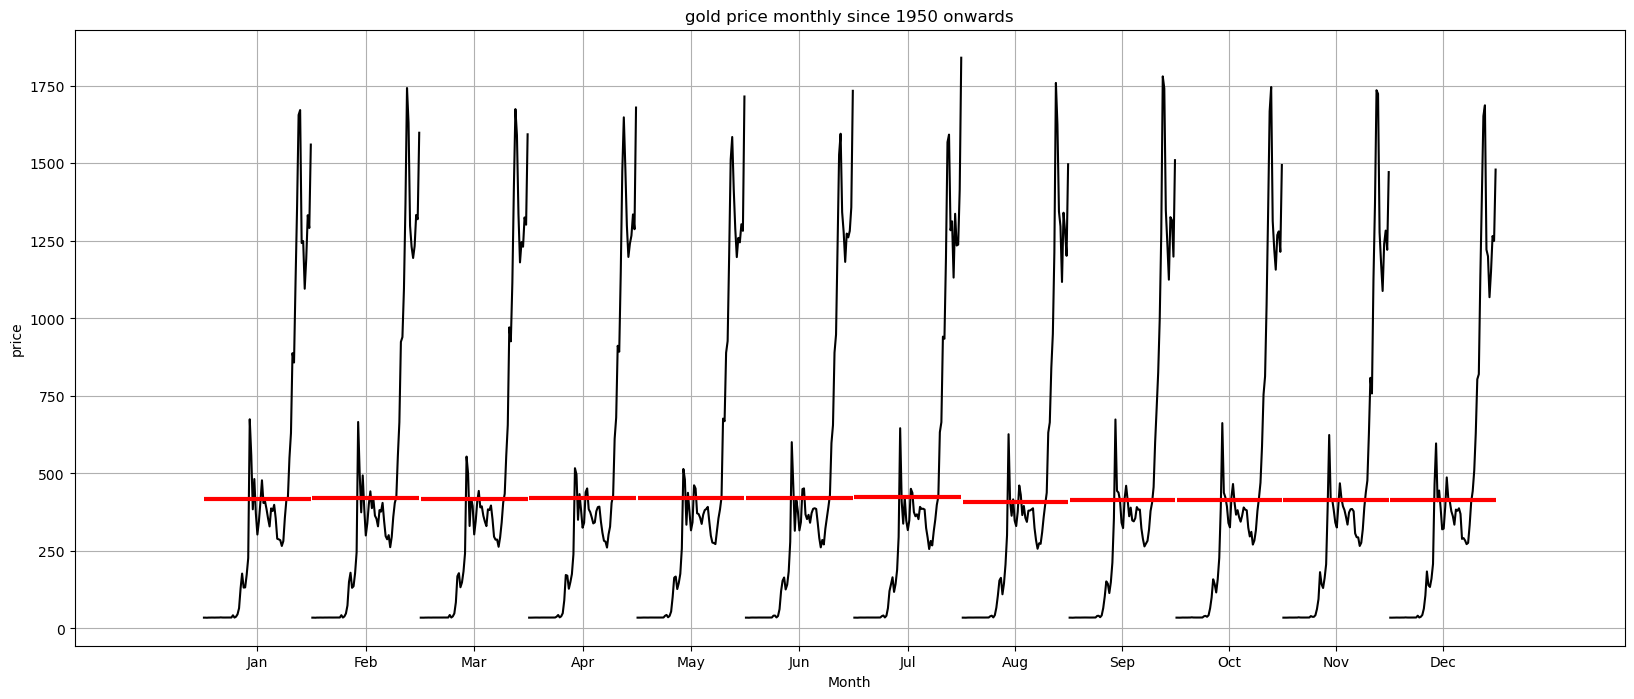

In [18]:
from statsmodels.graphics.tsaplots import month_plot

fig, ax = plt.subplots(figsize=(20,8))
month_plot(df, ylabel = 'gold price', ax = ax)
plt.title('gold price monthly since 1950 onwards')
plt.xlabel("Month")
plt.ylabel("price")
plt.grid()

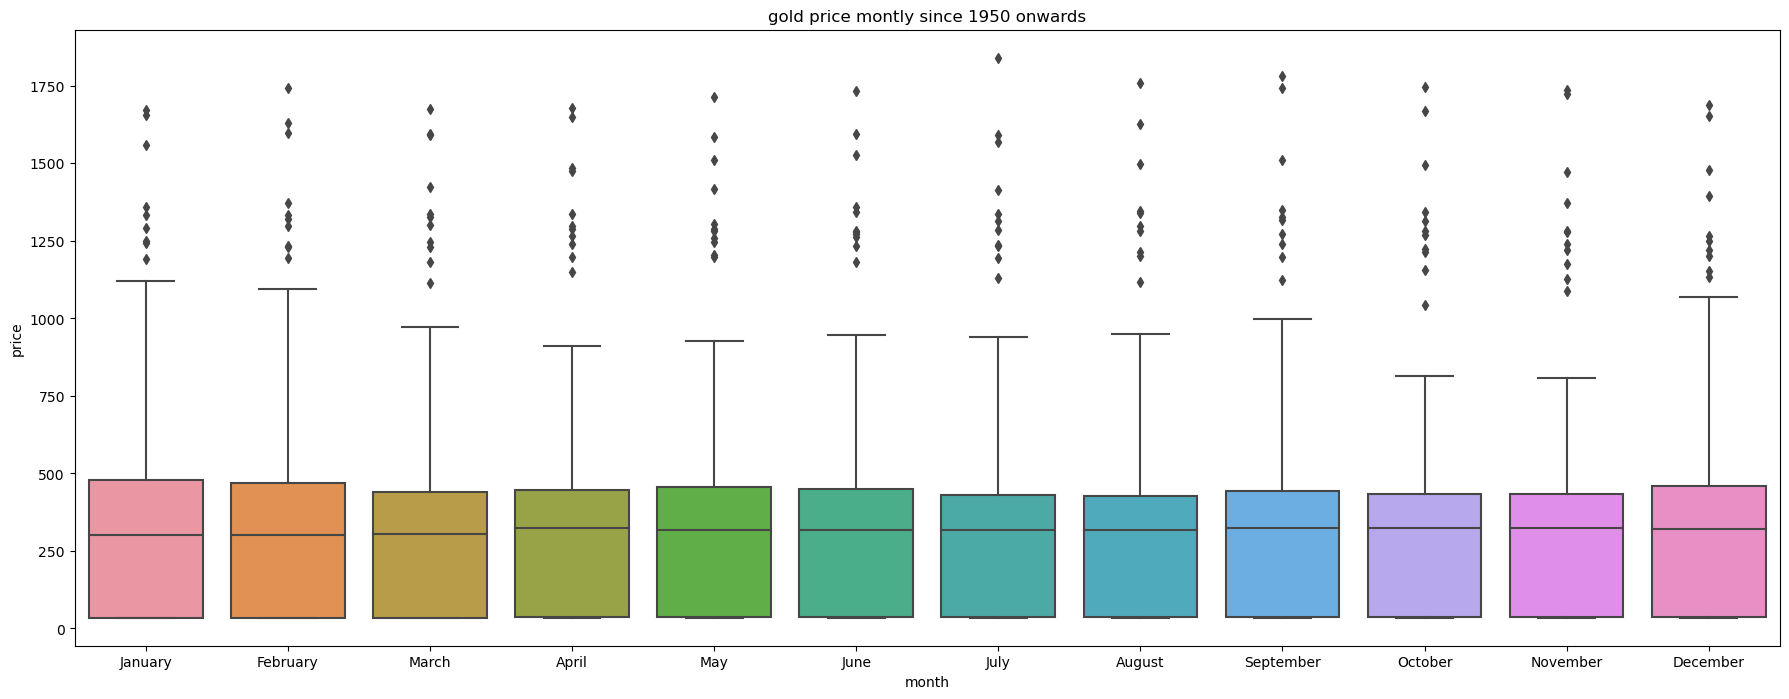

In [19]:
fig, ax = plt.subplots(figsize = (22,8))
sns.boxplot(x = df.index.month_name(), y = df.values[:, 0], ax = ax)
plt.title("gold price montly since 1950 onwards")
plt.xlabel("month")
plt.ylabel("price")
plt.show()

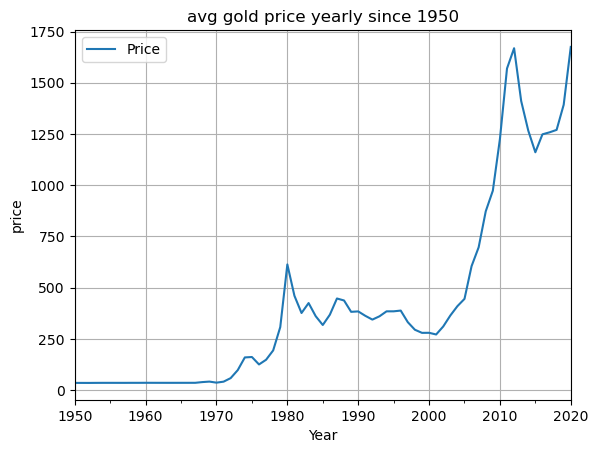

In [20]:
df_yearly_sum = df.resample('A').mean()
df_yearly_sum.plot();
plt.title("avg gold price yearly since 1950")
plt.xlabel("Year")
plt.ylabel("price")
plt.grid()

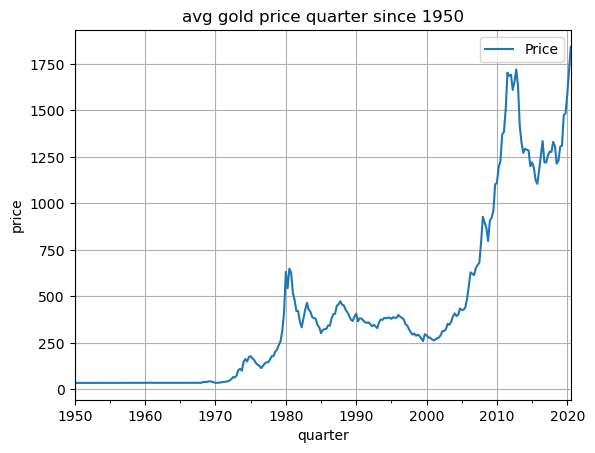

In [21]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.plot();
plt.title("avg gold price quarter since 1950")
plt.xlabel("quarter")
plt.ylabel("price")
plt.grid()

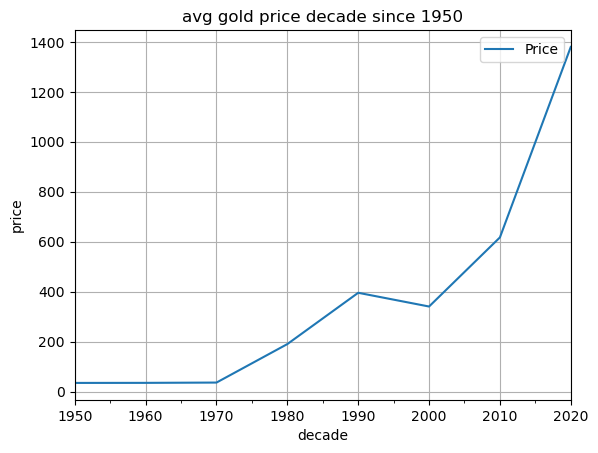

In [22]:
df_decade_mean = df.resample('10Y').mean()
df_decade_mean.plot();
plt.title("avg gold price decade since 1950")
plt.xlabel("decade")
plt.ylabel("price")
plt.grid()

In [31]:
df.head()

,Price
month,
1950-01-31,34.73
1950-02-28,34.73
1950-03-31,34.73
1950-04-30,34.73
1950-05-31,34.73


In [24]:
df_1 = df.groupby(df.index.year).mean().rename(columns = {'Price':'Mean'})
df_1 = df_1.merge(df.groupby(df.index.year).std().rename(columns = {'Price':'Std'}), left_index =  True, right_index = True)
df_1['cov_pct'] = ((df_1['Std']/df_1['Mean'])*100).round(2)
df_1.head()

,Mean,Std,cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24


In [34]:
pd.set_option('display.max_rows', None)

In [35]:
df_1

,Mean,Std,cov_pct
month,,,
1950,34.729167,0.002887,0.01
1951,34.717500,0.020057,0.06
1952,34.628333,0.117538,0.34
1953,34.879167,0.056481,0.16
1954,35.020000,0.082792,0.24
1955,35.023333,0.034728,0.10
1956,34.987500,0.031079,0.09
1957,34.947500,0.039801,0.11
1958,35.091667,0.027247,0.08


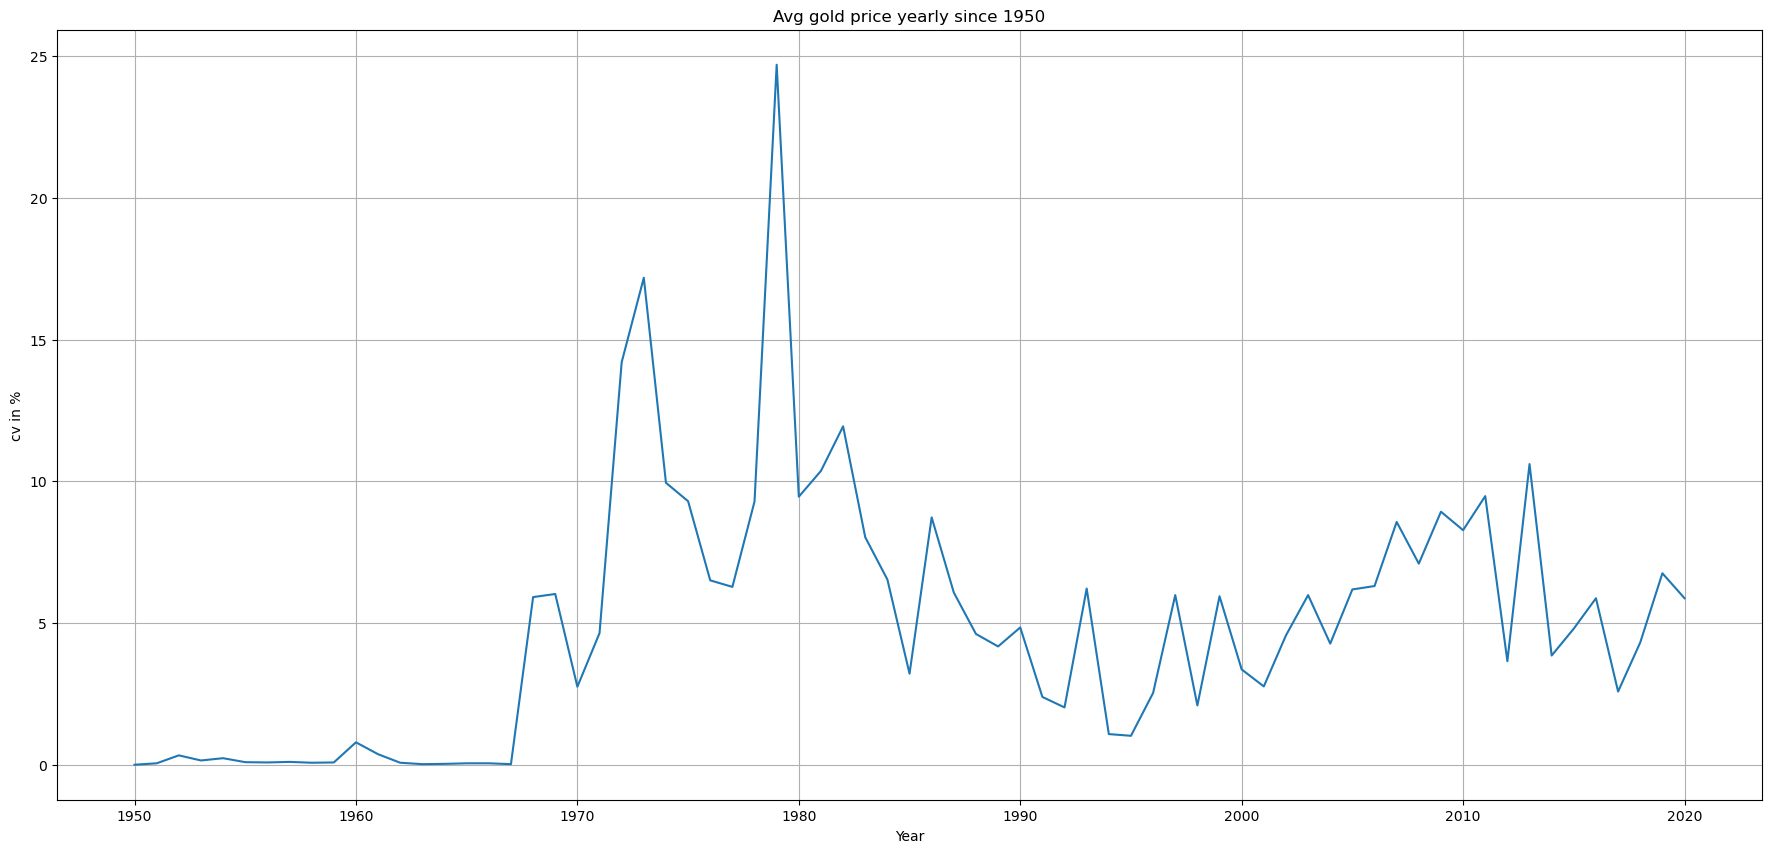

In [30]:
fig, ax = plt.subplots(figsize = (22,10))
df_1['cov_pct'].plot();
plt.title('Avg gold price yearly since 1950')
plt.xlabel('Year')
plt.ylabel('cv in %')
plt.grid()

Disini kita telah mencari presentase koefisien variasi, yang digunakan untuk mencari seberapa bervariasinya nilai ditiap tahunnya. Tahun 1979 menjadi tahun yang memiliki nilai koefisien variasi paling tinggi, bisa diartikan pada tahun tersebut telah terjadi fluktuasi harga emas yang mempengaruhi keputusan investor untuk berinvestasi terhadap emas.

In [37]:
train = df[df.index.year <= 2015]
test = df[df.index.year > 2015]

In [38]:
print(train.shape)
print(test.shape)

(792, 1)
(55, 1)


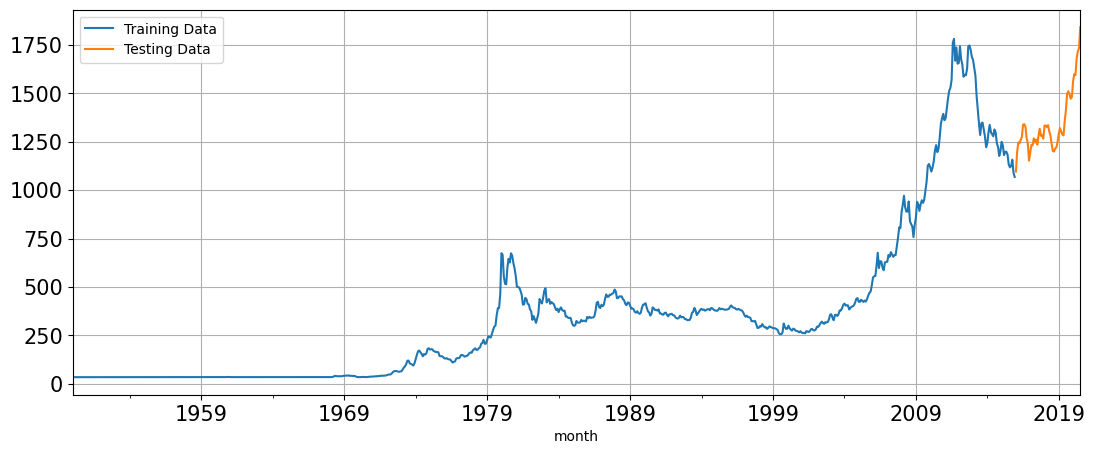

In [39]:
train["Price"].plot(figsize=(13,5), fontsize = 15)
test["Price"].plot(figsize=(13,5), fontsize = 15)
plt.grid()
plt.legend(["Training Data", "Testing Data"])
plt.show()

In [40]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+len(train)+1 for i in range(len(test))]
len(train_time), len(test_time)

(792, 55)

In [41]:
LR_train = train.copy()
LR_test = test.copy()

In [42]:
LR_train['time'] = train_time
LR_test['time'] = test_time

In [43]:
lr = LinearRegression()
lr.fit(LR_train[['time']], LR_train['Price'].values)

LinearRegression()

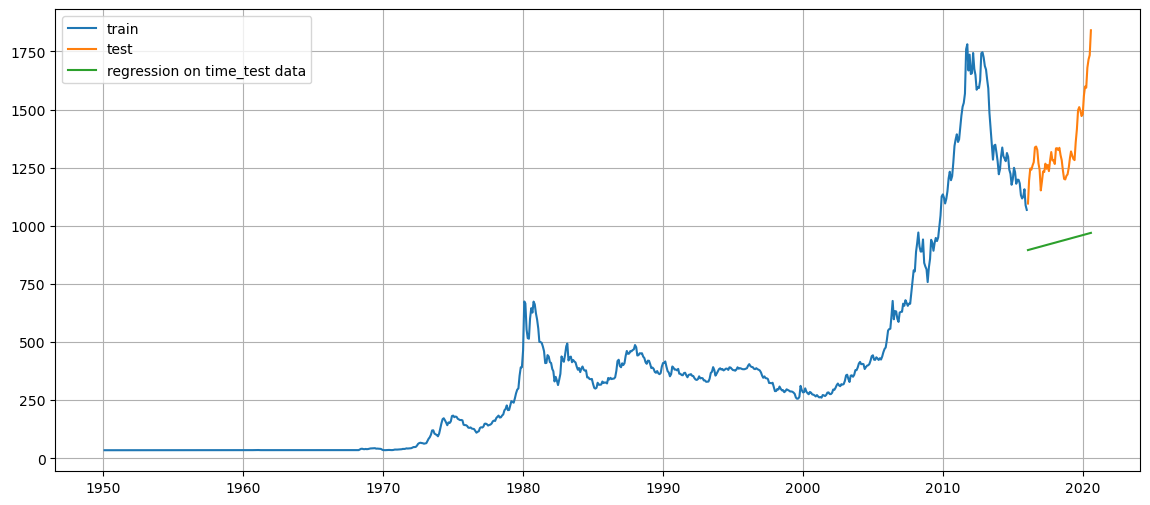

In [47]:
test_predictions_model1 = lr.predict(LR_test[['time']])
LR_test['forecast'] = test_predictions_model1

plt.figure(figsize = (14,6))
plt.plot(train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(LR_test['forecast'], label = 'regression on time_test data')
plt.legend(loc = 'best')
plt.grid()

In [48]:
def mape(actual, pred):
    return round((np.mean(abs(actual - pred)/actual))*100, 2)

In [51]:
mape_model1_test = mape(test['Price'].values, test_predictions_model1)
print("MAPE is %3.3f"%(mape_model1_test),"%")

MAPE is 29.760 %


In [52]:
results = pd.DataFrame({'Test Mape (%)':[mape_model1_test]}, index = ["RegressionOnTime"])
results

,Test Mape (%)
RegressionOnTime,29.76


In [53]:
naive_train = train.copy()
naive_test = test.copy()

In [54]:
naive_test['naive'] = np.asarray(train['Price'])[len(np.asarray(train['Price']))-1]
naive_test['naive'].head()

month
2016-01-31    1068.317
2016-02-29    1068.317
2016-03-31    1068.317
2016-04-30    1068.317
2016-05-31    1068.317
Name: naive, dtype: float64

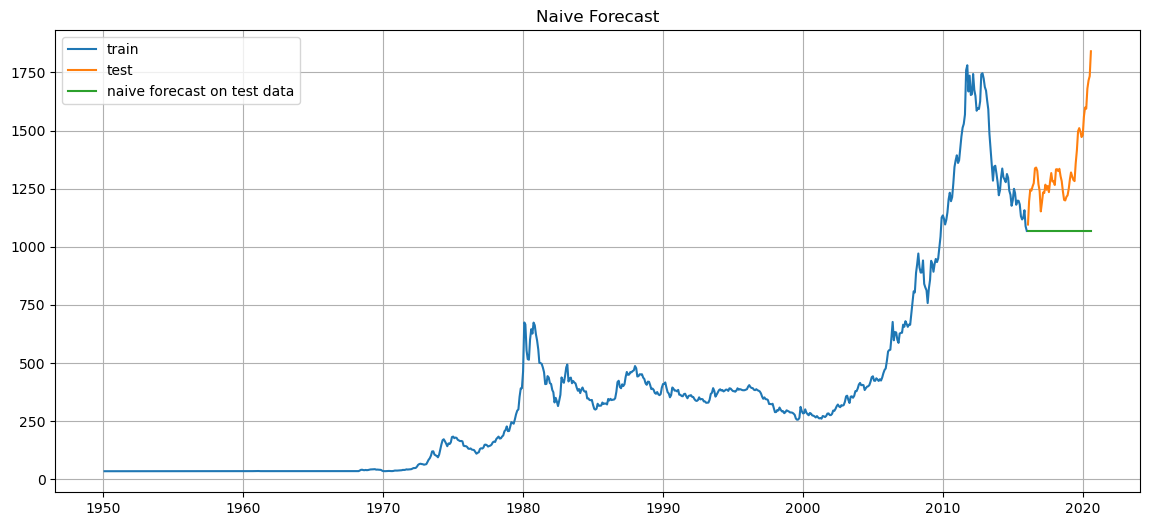

In [55]:
plt.figure(figsize = (14,6))
plt.plot(naive_train['Price'], label = 'train')
plt.plot(test['Price'], label = 'test')
plt.plot(naive_test['naive'], label = 'naive forecast on test data')
plt.legend(loc = 'best')
plt.title("Naive Forecast")
plt.grid()

In [56]:
mape_model2_test = mape(test['Price'].values, naive_test['naive'].values)
print("Naive Forecast on the test data, MAPE is %3.3f" %(mape_model2_test), "%")

Naive Forecast on the test data, MAPE is 19.380 %


In [57]:
result_model2 = pd.DataFrame({'Test Mape (%)':[mape_model2_test]}, index = ["Naive Model"])
results = pd.concat([results, result_model2])
results

,Test Mape (%)
RegressionOnTime,29.76
Naive Model,19.38


In [58]:
final_model = ExponentialSmoothing(df,
                                  trend = 'additive',
                                  seasonal = 'additive').fit(smoothing_level = 0.4,
                                                            smoothing_trend = 0.3,
                                                            smoothing_seasonal = 0.6)

In [59]:
mape_final_model = mape(df['Price'].values, final_model.fittedvalues)
print("MAPE: ", mape_final_model)

MAPE:  17.24


In [61]:
predictions = final_model.forecast(steps=len(test))
predictions

2020-08-31    1792.869246
2020-09-30    1723.452788
2020-10-31    1646.711851
2020-11-30    1584.899804
2020-12-31    1567.466182
2021-01-31    1622.554865
2021-02-28    1653.488839
2021-03-31    1664.900761
2021-04-30    1756.446701
2021-05-31    1802.363493
2021-06-30    1851.540211
2021-07-31    1904.246582
2021-08-31    1893.173803
2021-09-30    1823.757344
2021-10-31    1747.016408
2021-11-30    1685.204360
2021-12-31    1667.770738
2022-01-31    1722.859421
2022-02-28    1753.793396
2022-03-31    1765.205317
2022-04-30    1856.751257
2022-05-31    1902.668049
2022-06-30    1951.844767
2022-07-31    2004.551138
2022-08-31    1993.478359
2022-09-30    1924.061900
2022-10-31    1847.320964
2022-11-30    1785.508917
2022-12-31    1768.075295
2023-01-31    1823.163978
2023-02-28    1854.097952
2023-03-31    1865.509874
2023-04-30    1957.055814
2023-05-31    2002.972606
2023-06-30    2052.149324
2023-07-31    2104.855695
2023-08-31    2093.782916
2023-09-30    2024.366457
2023-10-31  

In [64]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96*np.std(final_model.resid,ddof = 1),
                       'Predictions': predictions,
                       'upper_CI': predictions + 1.96*np.std(final_model.resid,ddof = 1)})

In [65]:
pred_df

,lower_CI,Predictions,upper_CI
2020-08-31,1684.718274,1792.869246,1901.020219
2020-09-30,1615.301815,1723.452788,1831.603760
2020-10-31,1538.560879,1646.711851,1754.862823
2020-11-30,1476.748832,1584.899804,1693.050776
2020-12-31,1459.315210,1567.466182,1675.617154
2021-01-31,1514.403893,1622.554865,1730.705837
2021-02-28,1545.337867,1653.488839,1761.639811
2021-03-31,1556.749789,1664.900761,1773.051733
2021-04-30,1648.295729,1756.446701,1864.597673
2021-05-31,1694.212521,1802.363493,1910.514465


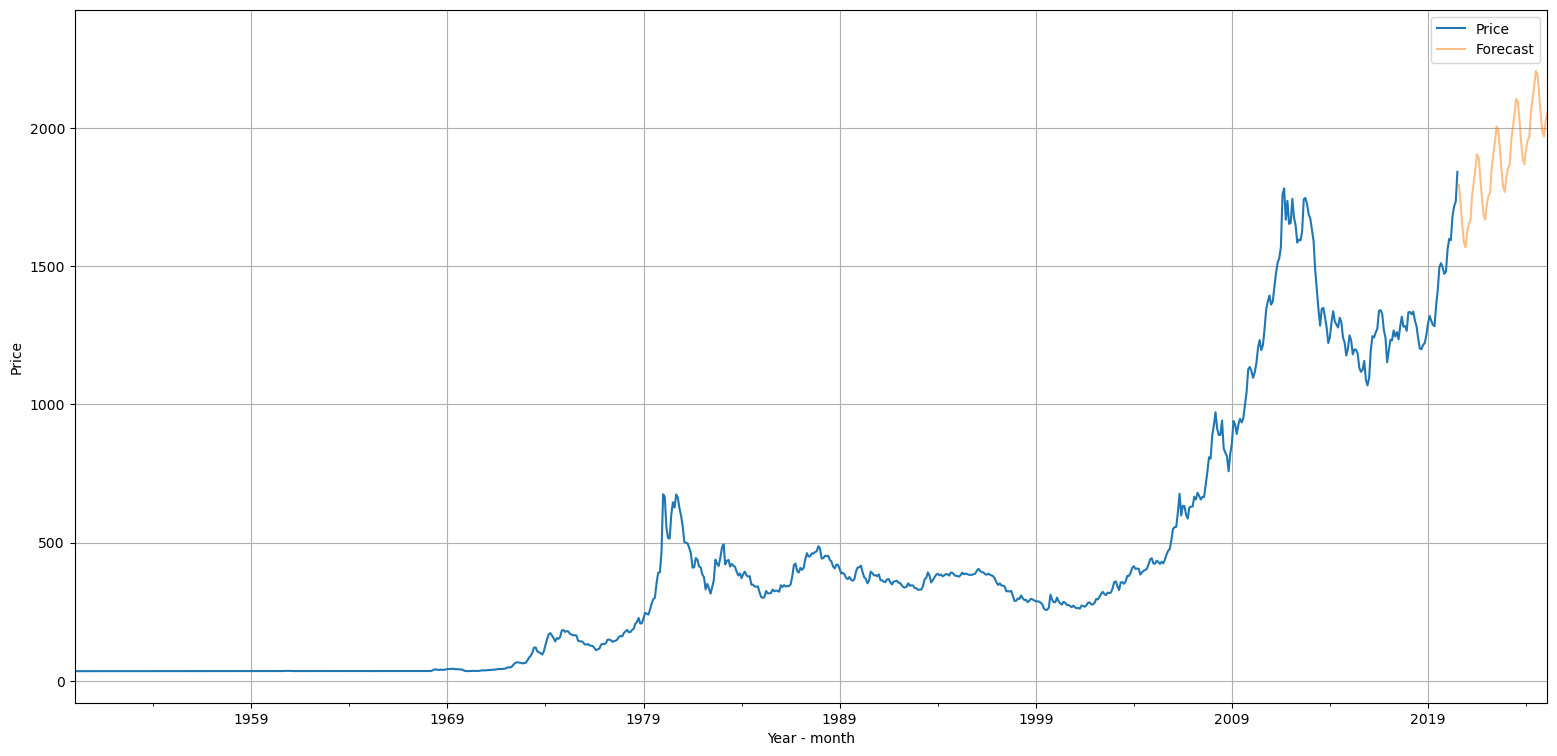

In [69]:
axis = df.plot(label ='Actual', figsize=(19,9))
pred_df['Predictions'].plot(ax = axis, label='Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha = .15)
axis.set_xlabel('Year - month')
axis.set_ylabel('Price')
plt.legend(loc = 'best')
plt.grid()
plt.show()